# Hogwarts Sorting Hat Implementation

In [1]:
# Importing Libraries
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import random_split
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('dataset_train.csv')
df_test = pd.read_csv('dataset_test.csv')

In [3]:
df_train.head()

Index Hogwarts House First Name  Last Name    Birthday Best Hand  \
0      0      Ravenclaw     Tamara        Hsu  2000-03-30      Left   
1      1      Slytherin      Erich    Paredes  1999-10-14     Right   
2      2      Ravenclaw   Stephany      Braun  1999-11-03      Left   
3      3     Gryffindor      Vesta  Mcmichael  2000-08-19      Left   
4      4     Gryffindor     Gaston      Gibbs  1998-09-27      Left   

   Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0     58384.0 -487.886086   5.727180                       4.878861   
1     67239.0 -552.060507  -5.987446                       5.520605   
2     23702.0 -366.076117   7.725017                       3.660761   
3     32667.0  697.742809  -6.497214                      -6.977428   
4     60158.0  436.775204  -7.820623                            NaN   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       4.722      272.035831     532.484226          5.231058   
1      -5.612     -487.340557     367.760303          4.107170   
2       6.140      664.893521     602.585284          3.555579   
3       4.026     -537.001128     523.982133         -4.809637   
4       2.236     -444.262537     599.324514         -3.444377   

   Transfiguration   Potions  Care of Magical Creatures     Charms  Flying  
0      1039.788281  3.790369                   0.715939 -232.79405  -26.89  
1      1058.944592  7.248742                   0.091674 -252.18425 -113.45  
2      1088.088348  8.728531                  -0.515327 -227.34265   30.42  
3       920.391449  0.821911                  -0.014040 -256.84675  200.64  
4       937.434724  4.311066                  -0.264070 -256.38730  157.98

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          1600 non-null   int64  
 1   Hogwarts House                 1600 non-null   object 
 2   First Name                     1600 non-null   object 
 3   Last Name                      1600 non-null   object 
 4   Birthday                       1600 non-null   object 
 5   Best Hand                      1600 non-null   object 
 6   Arithmancy                     1566 non-null   float64
 7   Astronomy                      1568 non-null   float64
 8   Herbology                      1567 non-null   float64
 9   Defense Against the Dark Arts  1569 non-null   float64
 10  Divination                     1561 non-null   float64
 11  Muggle Studies                 1565 non-null   float64
 12  Ancient Runes                  1565 non-null   f

In [5]:
df_test.head()

Index  Hogwarts House First Name    Last Name    Birthday Best Hand  \
0      0             NaN       Rico      Sargent  2001-10-06     Right   
1      1             NaN     Tamara  Shackelford  1998-01-08      Left   
2      2             NaN      Staci     Crandall  1998-09-15      Left   
3      3             NaN        Dee        Gavin  2001-05-10     Right   
4      4             NaN    Gregory    Gustafson  1999-02-01     Right   

   Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0     41642.0  696.096071   3.020172                      -6.960961   
1     45352.0 -370.844655   2.965226                       3.708447   
2     43502.0  320.303990  -6.185697                      -3.203040   
3     61831.0  407.202928   4.962442                            NaN   
4         NaN  288.337747   3.737656                      -2.883377   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       7.996     -365.151850     393.138185          4.207691   
1       6.349      522.580486     602.853051          6.460017   
2       4.619     -630.073207     588.071795         -5.565818   
3         NaN     -449.179806     427.699966               NaN   
4       4.886     -449.732166     385.712782          2.876347   

   Transfiguration   Potions  Care of Magical Creatures     Charms  Flying  
0      1046.742736  3.668983                   0.373853 -244.48172  -13.62  
1      1048.053878  8.514622                   0.577432 -231.29200  -26.26  
2       936.437358  1.850829                  -1.647150 -252.99343  200.15  
3      1043.397718  4.656573                   1.164708 -244.01660  -11.15  
4      1051.377936  2.750586                   0.102104 -243.99806   -7.12

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          400 non-null    int64  
 1   Hogwarts House                 0 non-null      float64
 2   First Name                     400 non-null    object 
 3   Last Name                      400 non-null    object 
 4   Birthday                       400 non-null    object 
 5   Best Hand                      400 non-null    object 
 6   Arithmancy                     387 non-null    float64
 7   Astronomy                      387 non-null    float64
 8   Herbology                      389 non-null    float64
 9   Defense Against the Dark Arts  392 non-null    float64
 10  Divination                     394 non-null    float64
 11  Muggle Studies                 390 non-null    float64
 12  Ancient Runes                  392 non-null    flo

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          1600 non-null   int64  
 1   Hogwarts House                 1600 non-null   object 
 2   First Name                     1600 non-null   object 
 3   Last Name                      1600 non-null   object 
 4   Birthday                       1600 non-null   object 
 5   Best Hand                      1600 non-null   object 
 6   Arithmancy                     1566 non-null   float64
 7   Astronomy                      1568 non-null   float64
 8   Herbology                      1567 non-null   float64
 9   Defense Against the Dark Arts  1569 non-null   float64
 10  Divination                     1561 non-null   float64
 11  Muggle Studies                 1565 non-null   float64
 12  Ancient Runes                  1565 non-null   f

We will go with Hogwarts Train dataset.

In [8]:
df_train.isna().sum()

Index                             0
Hogwarts House                    0
First Name                        0
Last Name                         0
Birthday                          0
Best Hand                         0
Arithmancy                       34
Astronomy                        32
Herbology                        33
Defense Against the Dark Arts    31
Divination                       39
Muggle Studies                   35
Ancient Runes                    35
History of Magic                 43
Transfiguration                  34
Potions                          30
Care of Magical Creatures        40
Charms                            0
Flying                            0
dtype: int64

<b>Inference</b>
<li>We have some missing values in numerical features - Arithmancy, Astronomy, Herbology, Defense Against the Dark Arts, Divination, Muggle Studies, Ancient Runes, History of Magic, Transfiguration, Potions, Care of Magical Creatures. We will fill missing values with the mean value of corresponding columns.

<li>Categorical features such as Best Hand and Hogwarts House should be converted into numerical.
<li>Relationship between features need to be seen

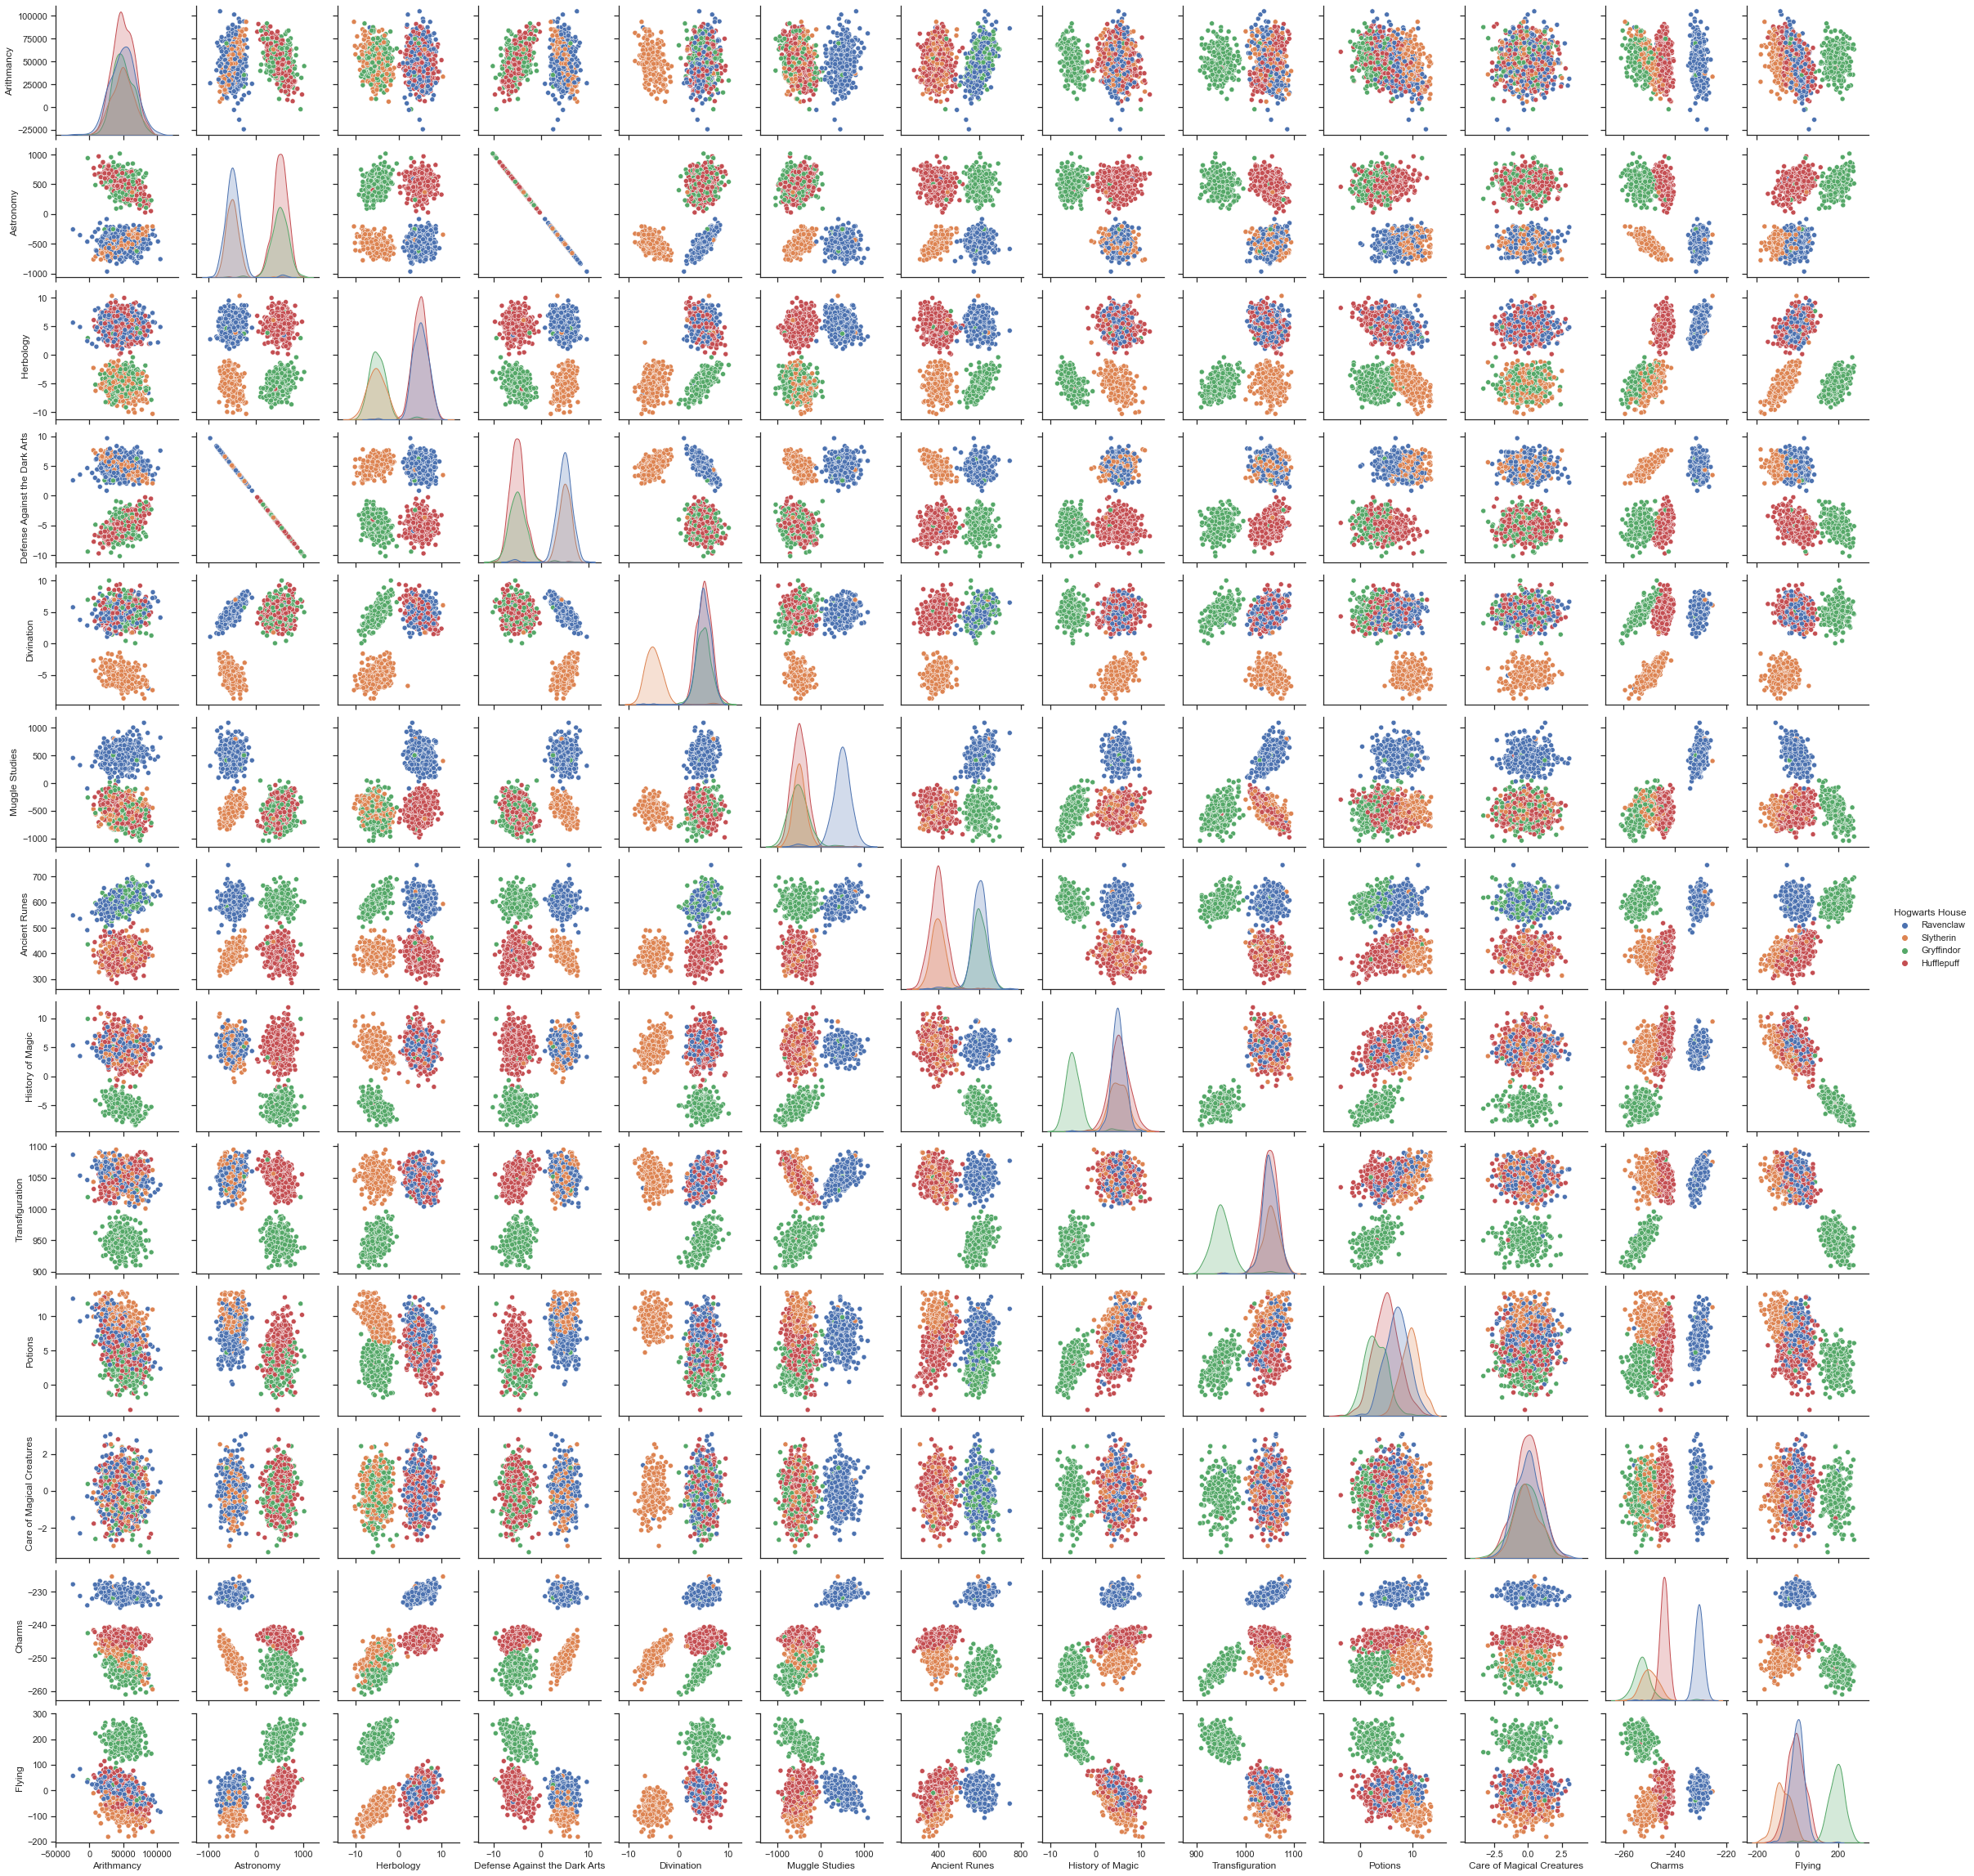

In [9]:
sns.set(style="ticks", color_codes=True)

df_viz = df_train.dropna()
# dropping the index because it does not make any sense to do a scatter pair plot on
df_viz = df_viz.drop("Index", axis=1)
g = sns.pairplot(df_viz, hue="Hogwarts House")
g.savefig('pairplot.png')

There is no use to use all features as some of them don't provide an obvious division into groups and can bring only noise. So far as we are looking for four clearly different groups, there Astrology, Herbology, Defense Against the Dark Arts, Ancient runes, Charms, Flying

Defense Against the Dark Arts and Astronomy look similar so we will check them

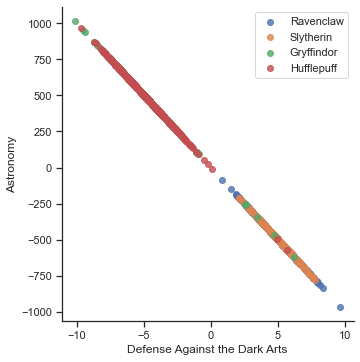

In [10]:
sns.lmplot(x="Defense Against the Dark Arts", 
           y="Astronomy", 
           data=df_train, 
           fit_reg=False, 
           hue='Hogwarts House', 
           legend=False)

plt.legend(loc='upper right')

In [11]:
df_train['Astronomy'] / df_train['Defense Against the Dark Arts']

0      -100.0
1      -100.0
2      -100.0
3      -100.0
4         NaN
        ...  
1595   -100.0
1596   -100.0
1597   -100.0
1598   -100.0
1599   -100.0
Length: 1600, dtype: float64

Here we see that these features are similar, one of them is a result of multiplication of the other on a specific number. We can drop one of them, let it be Astronomy

# Preprocessing

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

def standartize(df, names):
    tmp = df.copy()
    df = tmp[names]
    # Create the Scaler object
    scaler = preprocessing.StandardScaler()
    # Fit your data on the scaler object
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=names)
    return scaled_df, scaler
def preprocess_df(df):
    df = df.copy()
    # drop useless columns
    df = df.drop(columns=['Index', 'First Name', 'Last Name', 'Astronomy'])
    # fill missing values in features with mean
    df = df.fillna(df.mean())        
    # preprocess columns
    # convert categorical features to numerical
    df['Best Hand'] = df['Best Hand'].astype('category')
    df['Hogwarts House'] = df['Hogwarts House'].astype('category')
    # store mapping for later usage
    map_dict = dict(enumerate(df['Best Hand'].cat.categories)), dict(enumerate(df['Hogwarts House'].cat.categories))
    df['Best Hand'] = df['Best Hand'].cat.codes
    df['Hogwarts House'] = df['Hogwarts House'].cat.codes
    # convert string date to datetime
    df['Birthday'] = pd.to_datetime(df['Birthday'])
    # separate datetime into day, month, year features
    df['Birth_day'] = df['Birthday'].dt.day
    df['Birth_month'] = df['Birthday'].dt.month
    df['Birth_year'] = df['Birthday'].dt.year
    df = df.drop(columns=['Birthday'])
    
    X = df.drop(columns=['Hogwarts House'])
    y = df['Hogwarts House']
    
    # get train and val split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  
    transformed_features = list(set(X_train.columns) - set(['Best Hand']))
    
    train_indxs = X_train.index
    test_indxs = X_test.index
    
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    # standartize train
    X_train_scaled, scaler = standartize(X_train, transformed_features)
    X_train_scaled['Best Hand'] = X_train['Best Hand']
    
    # standartize test
    X_test_scaled = scaler.fit_transform(X_test[transformed_features])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=transformed_features)
    X_test_scaled['Best Hand'] = X_test['Best Hand']
    
    preprocessing_params = {'map_dict': map_dict,
                            'scaler': scaler,
                            'train_indxs':train_indxs,
                            'test_indxs':test_indxs}
    
    return X_train_scaled, X_test_scaled, y_train, y_test, preprocessing_params

In [13]:
X_train, X_test, y_train, y_test, processing_params = preprocess_df(df_train)

In [14]:
X_train.head()

Transfiguration  Birth_day  Herbology  Birth_month  \
0        -0.231908  -1.437774   0.370353     1.618190   
1         0.141480  -1.437774   0.484086    -0.735541   
2        -1.875075  -0.980620  -1.026683    -0.735541   
3         0.974693   0.619418  -1.503661    -0.147108   
4         0.628948   0.390841   0.800832    -0.441325   

   Defense Against the Dark Arts   Potions  Birth_year  \
0                      -1.736339  1.848475   -1.254100   
1                       1.181918  0.586672   -0.561470   
2                      -0.800945 -1.043780    0.823791   
3                       1.332821  1.716450   -0.561470   
4                       1.167184 -0.029892    0.823791   

   Care of Magical Creatures    Charms  History of Magic  Muggle Studies  \
0                   0.437238  0.113604          1.574189       -0.077914   
1                   0.463269  1.274715          0.577970        1.127152   
2                  -0.641019 -0.797002         -1.924841       -0.968363   
3                  -0.648676 -0.691669          0.997044       -0.849689   
4                   1.267019  1.467603          0.326786        1.796741   

     Flying  Divination  Arithmancy  Ancient Runes  Best Hand  
0  0.158227    0.929596   -3.084841      -0.589052          0  
1 -0.177934    0.216637   -0.315718       0.928244          1  
2  2.064874    0.834743   -1.170422       0.941062          1  
3 -1.559613   -2.092976    0.023633      -1.525900          1  
4 -0.284332    0.155162   -1.370539       0.392511          1

In [15]:
processing_params

{'map_dict': ({0: 'Left', 1: 'Right'},
  {0: 'Gryffindor', 1: 'Hufflepuff', 2: 'Ravenclaw', 3: 'Slytherin'}),
 'scaler': StandardScaler(),
 'train_indxs': Int64Index([ 820,  567,  355, 1545,  209,  140, 1488, 1120, 1047, 1446,
             ...
             1238,  466,  121, 1044, 1095, 1130, 1294,  860, 1459, 1126],
            dtype='int64', length=1072),
 'test_indxs': Int64Index([ 526,  354,  168,  135,  937, 1544, 1253,  237,  478,  650,
             ...
              915, 1467,  296, 1483,  461, 1593,  785,  377, 1471,  126],
            dtype='int64', length=528)}

<AxesSubplot:>

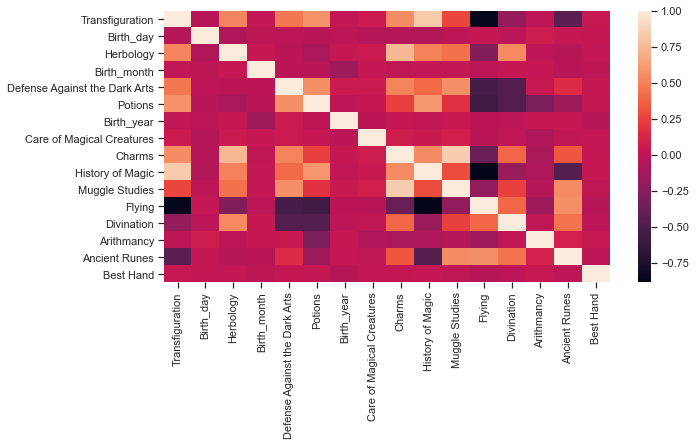

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(X_train.corr())

convert dataframe as numpy arrays and then convert them to pytorch tensors

In [17]:
def df_to_numpyarray(X, y):
    # Extract input & outupts as numpy arrays
    inputs_array = X.to_numpy()
    targets_array = y.to_numpy()
    return inputs_array, targets_array

In [18]:
X_train, y_train = df_to_numpyarray(X_train, y_train)
X_test, y_test = df_to_numpyarray(X_test, y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1072, 16) (1072,)
(528, 16) (528,)


In [19]:
tmp = X_test.copy()
X_test = tmp[:int(len(tmp)*0.5)]
X_val = tmp[int(len(tmp)*0.5):]

tmp = y_test.copy()
y_test = tmp.copy()[:int(len(tmp)*0.5)]
y_val = tmp.copy()[int(len(tmp)*0.5):]

X_test.shape, X_val.shape, y_test.shape, y_val.shape

((264, 16), (264, 16), (264,), (264,))

# Training Parameters

In [20]:
# Hyperparmeters
batch_size = 64
learning_rate = 1e-3

# Other constants
input_size = 16
num_classes = 4

# Data loaders
Next, we need to create PyTorch datasets & data loaders for training & validation.

In [21]:
# convert numpy arrays to Tensors
train_inputs = torch.from_numpy(X_train).float()
train_targets = torch.from_numpy(y_train).type(torch.LongTensor)

val_inputs = torch.from_numpy(X_val).float()
val_targets = torch.from_numpy(y_val).type(torch.LongTensor)

test_inputs = torch.from_numpy(X_test).float()
test_targets = torch.from_numpy(y_test).type(torch.LongTensor)

In [22]:
train_inputs, val_inputs, test_inputs, train_targets, val_targets, test_targets

(tensor([[-0.2319, -1.4378,  0.3704,  ..., -3.0848, -0.5891,  0.0000],
         [ 0.1415, -1.4378,  0.4841,  ..., -0.3157,  0.9282,  1.0000],
         [-1.8751, -0.9806, -1.0267,  ..., -1.1704,  0.9411,  1.0000],
         ...,
         [-1.8106,  1.7623, -0.9906,  ...,  1.1825,  1.7305,  1.0000],
         [ 0.2597, -0.6378,  0.9977,  ..., -0.4884, -0.8353,  0.0000],
         [ 0.9112,  0.2766, -1.3685,  ..., -1.4480, -1.0657,  1.0000]]),
 tensor([[ 2.7499e-01, -1.3026e+00,  2.7710e-01,  ..., -4.2832e-02,
          -1.8291e-01,  1.0000e+00],
         [ 1.0789e+00, -4.9763e-01,  4.7808e-01,  ...,  1.7160e+00,
          -5.4174e-01,  1.0000e+00],
         [ 5.2447e-01,  6.5226e-01, -1.0925e+00,  ..., -7.4673e-01,
          -8.0520e-01,  0.0000e+00],
         ...,
         [-2.1718e-03, -2.6765e-01,  9.1278e-01,  ..., -2.7663e+00,
          -9.6726e-01,  0.0000e+00],
         [ 4.4766e-01,  1.4572e+00,  4.1262e-01,  ..., -5.4531e-01,
          -1.1014e+00,  0.0000e+00],
         [-1.0680e-

In [23]:
[s.shape for s in [train_inputs, val_inputs, test_inputs, train_targets, val_targets, test_targets]]

[torch.Size([1072, 16]),
 torch.Size([264, 16]),
 torch.Size([264, 16]),
 torch.Size([1072]),
 torch.Size([264]),
 torch.Size([264])]

In [24]:
# Dataset
train_dataset = TensorDataset(train_inputs, train_targets)
val_dataset = TensorDataset(val_inputs, val_targets)
test_dataset = TensorDataset(test_inputs, test_targets)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size*2)
test_loader = DataLoader(test_dataset, batch_size*2)

In [25]:
item, label = train_dataset[120]
print(item, label)

tensor([ 3.8875e-01,  4.7976e-02,  1.2128e+00,  7.3554e-01,  7.3246e-01,
         5.1026e-01,  8.2379e-01, -7.6630e-01,  1.5868e+00,  1.1845e+00,
         3.1140e-04, -5.8556e-01,  7.2260e-01,  8.4221e-01,  1.0304e+00,
         1.0000e+00]) tensor(2)


In [26]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[ 0.4599, -1.2092,  0.8671,  ..., -1.9070,  0.5272,  0.0000],
        [ 0.6101, -1.3235, -1.1870,  ..., -0.2666, -0.9258,  1.0000],
        [ 0.1472,  0.3908,  0.4695,  ..., -0.0618,  0.8144,  0.0000],
        ...,
        [ 0.4161, -1.3235,  1.1485,  ..., -0.6516,  0.9117,  0.0000],
        [ 0.5709, -0.1806,  0.6172,  ...,  0.4313, -1.0545,  1.0000],
        [ 0.2169,  0.1623,  0.4987,  ..., -1.7366, -0.8638,  1.0000]])
targets: tensor([2, 3, 2, 2, 1, 3, 0, 2, 3, 2, 2, 1, 2, 2, 3, 1, 0, 0, 3, 1, 2, 2, 1, 0,
        0, 3, 0, 1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 1, 2, 3, 0, 1, 2, 1, 1, 3, 0,
        3, 0, 0, 1, 3, 1, 2, 2, 1, 1, 3, 2, 1, 2, 1, 1])


# Model

### Logistic Regression using PyTorch

In [27]:
class HousingModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                  # Generate predictions
        loss = F.cross_entropy(out, targets) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                    # Generate predictions
        loss = F.cross_entropy(out, targets)   # Calculate loss
        acc = accuracy(out, targets)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [28]:
model = HousingModel()

# Training

In [29]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [30]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [31]:
evaluate(model, val_loader),\
evaluate(model, test_loader)

({'val_loss': 1.4562047719955444, 'val_acc': 0.1901041716337204},
 {'val_loss': 1.5677499771118164, 'val_acc': 0.1848958283662796})

In [32]:
%%time
history = fit(150, 1e-3, model, train_loader, val_loader)

Epoch [0], val_loss: 1.4264, val_acc: 0.2474
Epoch [1], val_loss: 1.3972, val_acc: 0.3021
Epoch [2], val_loss: 1.3687, val_acc: 0.3229
Epoch [3], val_loss: 1.3410, val_acc: 0.3411
Epoch [4], val_loss: 1.3139, val_acc: 0.3490
Epoch [5], val_loss: 1.2876, val_acc: 0.3672
Epoch [6], val_loss: 1.2619, val_acc: 0.3828
Epoch [7], val_loss: 1.2369, val_acc: 0.3932
Epoch [8], val_loss: 1.2126, val_acc: 0.4505
Epoch [9], val_loss: 1.1889, val_acc: 0.4688
Epoch [10], val_loss: 1.1659, val_acc: 0.5339
Epoch [11], val_loss: 1.1434, val_acc: 0.5599
Epoch [12], val_loss: 1.1216, val_acc: 0.5781
Epoch [13], val_loss: 1.1004, val_acc: 0.6354
Epoch [14], val_loss: 1.0797, val_acc: 0.6510
Epoch [15], val_loss: 1.0596, val_acc: 0.6615
Epoch [16], val_loss: 1.0401, val_acc: 0.6771
Epoch [17], val_loss: 1.0210, val_acc: 0.6953
Epoch [18], val_loss: 1.0025, val_acc: 0.7135
Epoch [19], val_loss: 0.9845, val_acc: 0.7292
Epoch [20], val_loss: 0.9670, val_acc: 0.7344
Epoch [21], val_loss: 0.9500, val_acc: 0.737

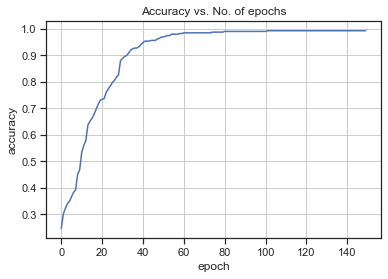

In [33]:
accuracies = [r['val_acc'] for r in history]
plt.plot(accuracies)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

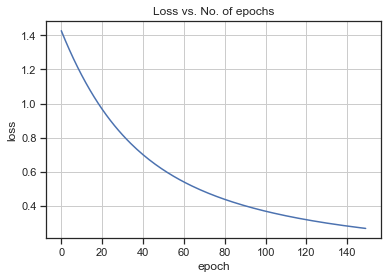

In [34]:
accuracies = [r['val_loss'] for r in history]
plt.plot(accuracies)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

In [35]:
# Evaluate on val dataset
result = evaluate(model, val_loader)
result

{'val_loss': 0.26870080828666687, 'val_acc': 0.9921875}

In [36]:
# Evaluate on test dataset
result = evaluate(model, test_loader)
result

{'val_loss': 0.2510205805301666, 'val_acc': 0.9895833134651184}

# Prediction

In [37]:
df_train.iloc[processing_params['test_indxs'][int(len(processing_params['test_indxs'])*0.5):]][['Hogwarts House', 'First Name', 'Last Name']]

Hogwarts House First Name Last Name
1093     Hufflepuff      Terri    Spring
582      Hufflepuff      Bryce      Epps
787       Slytherin   Carmella     Brice
1214     Hufflepuff    Donnell   Hammons
128       Slytherin     Wilbur  Burnside
...             ...        ...       ...
1593      Ravenclaw    Adeline    Church
785      Hufflepuff       Asia   Bledsoe
377      Hufflepuff     Armand   Bolling
1471     Hufflepuff    Katrina    Burley
126      Hufflepuff     Amanda     Anaya

[264 rows x 3 columns]

In [38]:
testing_indexes = df_train.iloc[processing_params['test_indxs'][int(len(processing_params['test_indxs'])*0.5):]][['Hogwarts House', 'First Name', 'Last Name']].index
testing_indexes = {index:num for num, index in enumerate(testing_indexes)}
testing_indexes

{1093: 0,
 582: 1,
 787: 2,
 1214: 3,
 128: 4,
 425: 5,
 1581: 6,
 1318: 7,
 1589: 8,
 1595: 9,
 500: 10,
 1560: 11,
 522: 12,
 1436: 13,
 371: 14,
 864: 15,
 543: 16,
 909: 17,
 481: 18,
 1517: 19,
 411: 20,
 1181: 21,
 997: 22,
 231: 23,
 1366: 24,
 429: 25,
 163: 26,
 1296: 27,
 266: 28,
 1005: 29,
 873: 30,
 692: 31,
 1450: 32,
 1263: 33,
 192: 34,
 548: 35,
 63: 36,
 772: 37,
 966: 38,
 1023: 39,
 651: 40,
 1312: 41,
 858: 42,
 816: 43,
 629: 44,
 218: 45,
 1578: 46,
 286: 47,
 1288: 48,
 1174: 49,
 589: 50,
 1074: 51,
 1315: 52,
 383: 53,
 1273: 54,
 700: 55,
 1532: 56,
 628: 57,
 693: 58,
 705: 59,
 497: 60,
 1168: 61,
 490: 62,
 1524: 63,
 706: 64,
 774: 65,
 1255: 66,
 979: 67,
 1299: 68,
 277: 69,
 1240: 70,
 949: 71,
 793: 72,
 236: 73,
 670: 74,
 1333: 75,
 1541: 76,
 1271: 77,
 1105: 78,
 208: 79,
 1149: 80,
 1356: 81,
 450: 82,
 58: 83,
 495: 84,
 1204: 85,
 1529: 86,
 1311: 87,
 1433: 88,
 649: 89,
 809: 90,
 1287: 91,
 427: 92,
 1189: 93,
 292: 94,
 552: 95,
 1228: 96,


In [39]:
def get_prediction(dataset, model, index, mapping):
    input, target = dataset[index]
    predict_single(input, target, model, mapping)

def predict_single(input, target, model, mapping):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)
    _, predictions  = torch.max(predictions, dim=1)
    prediction = predictions[0].detach()
    print("Target:", mapping[target.item()])
    print("Prediction:", mapping[prediction.item()])

In [40]:
#Testing on 10 random items from the test dataset
import random

for id_ in [random.choice(list(testing_indexes.keys())) for _ in range(10)]:
    get_prediction(test_dataset, model, testing_indexes[id_], processing_params['map_dict'][1])
    print('---')

Target: Slytherin
Prediction: Slytherin
---
Target: Slytherin
Prediction: Slytherin
---
Target: Slytherin
Prediction: Slytherin
---
Target: Hufflepuff
Prediction: Hufflepuff
---
Target: Ravenclaw
Prediction: Ravenclaw
---
Target: Slytherin
Prediction: Slytherin
---
Target: Hufflepuff
Prediction: Hufflepuff
---
Target: Hufflepuff
Prediction: Hufflepuff
---
Target: Gryffindor
Prediction: Gryffindor
---
Target: Ravenclaw
Prediction: Ravenclaw
---


#### As we can see, achieved results and accuracy on train and validation sets are pretty close and good enough:

'val_acc' ~ 99.479 %, 'test_acc' ~ 98.958 %